## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

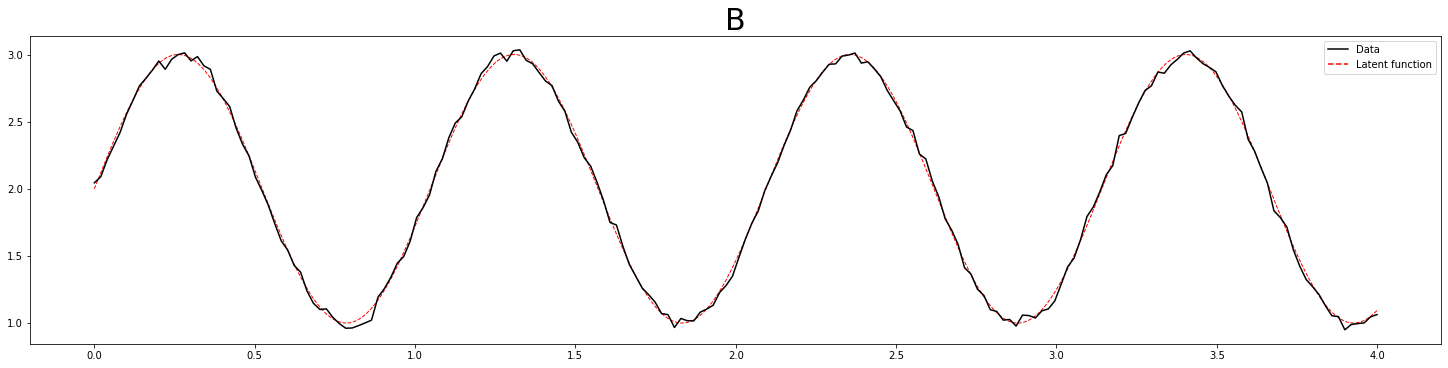

In [2]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)
data.plot()

In [ ]:
data.transform(mogptk.TransformLog)
data.plot()

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.init_params()
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
#mogptk.plot_sm_psd(sm)

In [ ]:
sm.build()
sm.set_pred_range(0, 0.0, 5.0, 2000)
sm.predict()
sm.data[0].plot()

In [ ]:
sm.build()
sm.save('sm')

In [ ]:
sm2 = mogptk.LoadModel('sm')
sm2.data[0].set_pred_range(0.0, 10.0, n=2000)
sm2.predict()
sm2.data[0].plot()

## MOSM

In [3]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([-0.76736999]),
  'mean': array([[0.49942115]]),
  'variance': array([[0.64021061]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([0.71299671]),
  'mean': array([[-0.38937733]]),
  'variance': array([[0.94637507]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-1.16186779]),
  'mean': array([[-2.42398202]]),
  'variance': array([[0.10900818]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.16564657])}]

In [4]:
mosm.init_params(plot=True)
display(mosm.get_params())

[{'magnitude': array([1.]),
  'mean': array([[5.94036899]]),
  'variance': array([[0.2225986]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.]),
  'mean': array([[3.47042609]]),
  'variance': array([[0.32530521]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.]),
  'mean': array([[2.09476169]]),
  'variance': array([[0.15442661]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.16564657])}]

In [5]:
mosm.build()
mosm.fix_param('variance')
mosm.train()
display(mosm.get_params())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -368.260959
  Number of iterations: 33
  Number of functions evaluations: 45
Done in  0.029792376359303794  minutes


[{'magnitude': array([0.41604795]),
  'mean': array([[5.97640799]]),
  'variance': array([[0.2225986]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-2.2409745e-05]),
  'mean': array([[3.26682944]]),
  'variance': array([[0.32530521]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.21645375]),
  'mean': array([[0.01663505]]),
  'variance': array([[0.15442661]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.00078817])}]

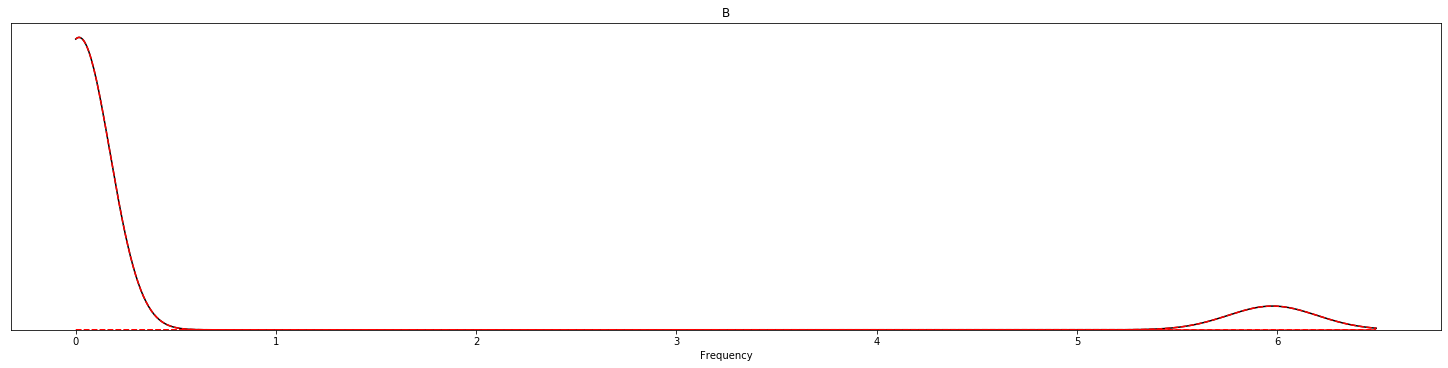

In [6]:
mosm.plot()

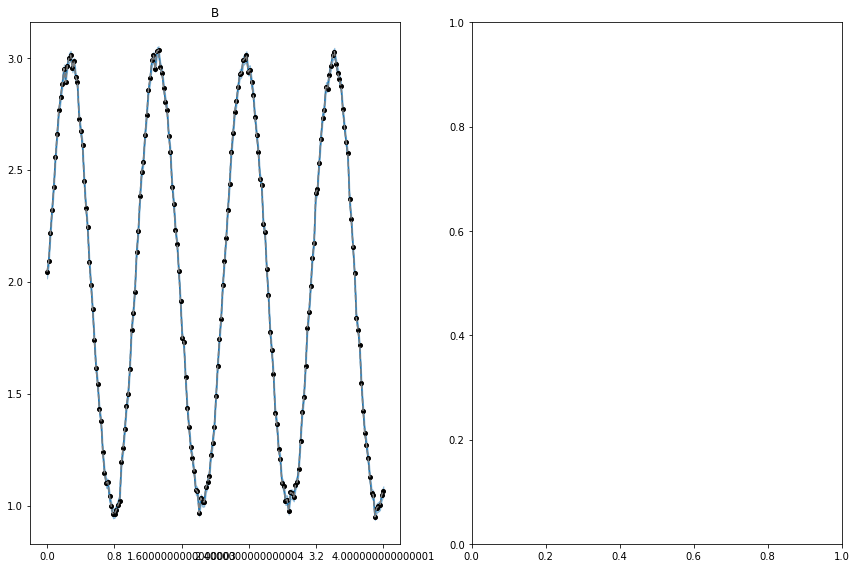

In [8]:
mosm.get_channel(0).set_pred_range(0.0, 5.0, n=200)
mosm.predict()
mogptk.plot_prediction(mosm);

In [ ]:
mosm.save('mosm')

In [ ]:
mosm2 = mogptk.LoadModel('mosm')
mosm2.plot()

In [ ]:
mosm2.set_pred_range(0, 0.0, 5.0, n=200)
mosm2.predict()
mogptk.plot_prediction(mosm2);

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.init_params(plot=True)
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.build()
smlmc.set_pred_range(0, 0.0, 5.0, n=200)
smlmc.predict()
mogptk.plot_prediction(smlmc);

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.init_params()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
csm.build()
csm.set_pred_range(0, 0.0, 5.0, n=200)
csm.predict()
mogptk.plot_prediction(csm);

## CG

In [ ]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

In [ ]:
cg.init_params()
display(cg.get_params())

In [ ]:
cg.train(method='Adam')
display(cg.get_params())

In [ ]:
cg.build()
cg.set_pred_range(0, 0.0, 5.0, n=200)
cg.predict()
mogptk.plot_prediction(cg);